In [83]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display
from pathlib import Path

import poppy
from poppy.poppy_core import PlaneType

# import zosapi
# from System import Enum,Int32,Double,Array

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")
from importlib import reload

from apra_pop_models import fresnel_ote
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.utils as utils
from apra_pop_models.imshows import imshow1, imshow2, imshow3

pupil_diam = 6.5*u.m
wavelength_c = 650e-9*u.m

In [84]:
reload(fresnel_ote)
tmodel = fresnel_ote.OTE()

In [80]:
m2_x_shift = np.abs(tmodel.m2_shift_per_mas) * 50*u.mas
m2_y_shift = np.abs(tmodel.m2_shift_per_mas) * 50*u.mas

m2_x_shift_pix = (m2_x_shift/tmodel.m2_opd.pixelscale).decompose()
m2_y_shift_pix = (m2_y_shift/tmodel.m2_opd.pixelscale).decompose()
print(m2_x_shift_pix, m2_y_shift_pix)

m3_x_shift = np.abs(tmodel.m3_shift_per_mas) * 50*u.mas
m3_y_shift = np.abs(tmodel.m3_shift_per_mas) * 50*u.mas

m3_x_shift_pix = (m3_x_shift/tmodel.m3_opd.pixelscale).decompose()
m3_y_shift_pix = (m3_y_shift/tmodel.m3_opd.pixelscale).decompose()
print(m3_x_shift_pix, m3_y_shift_pix)

0.029407179487160706 pix 0.029407179487160706 pix
2.32448000000004 pix 2.32448000000004 pix


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd4a78990>


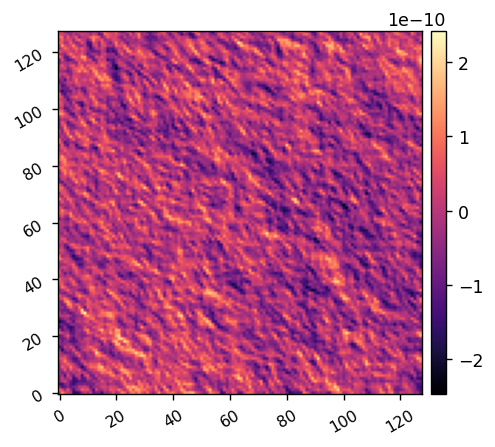

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd4b29b50>


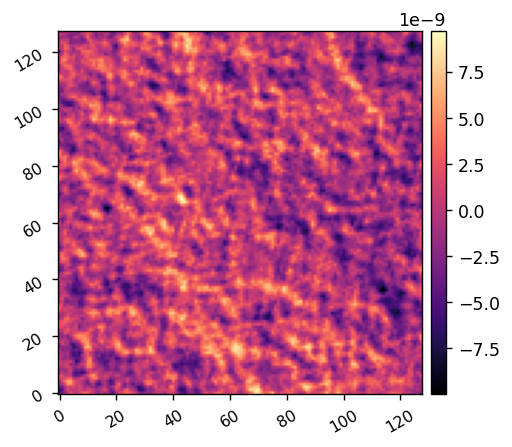

In [82]:
m2_shifted_opd = _scipy.ndimage.shift(tmodel.m2_opd.opd, (m2_y_shift_pix.value, m2_x_shift_pix.value))
diff = tmodel.m2_opd.opd - m2_shifted_opd
imshow1(diff, npix=128)

m3_shifted_opd = _scipy.ndimage.shift(tmodel.m3_opd.opd, (m3_y_shift_pix.value, m3_x_shift_pix.value))
diff = tmodel.m3_opd.opd - m3_shifted_opd
imshow1(diff, npix=128)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd49bedd0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd49e1ed0>


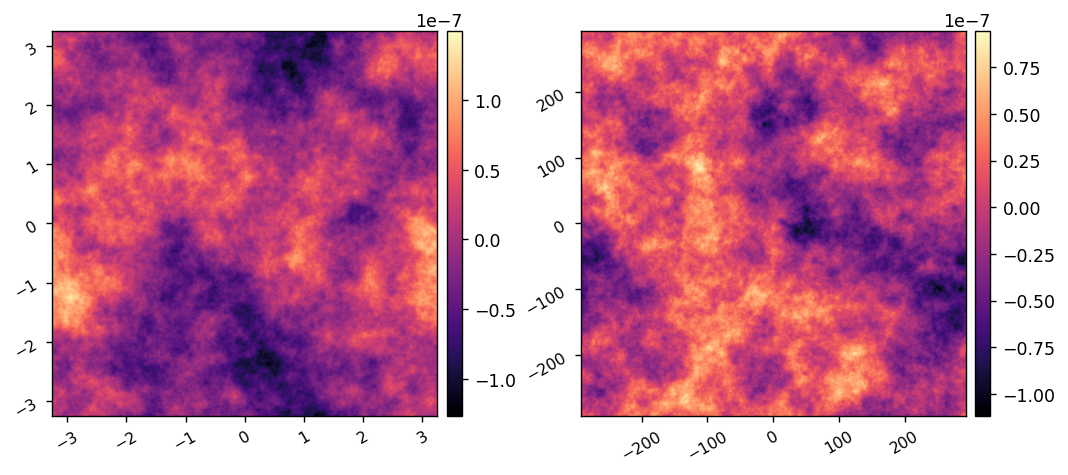

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd5cddfd0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd5b8e0d0>


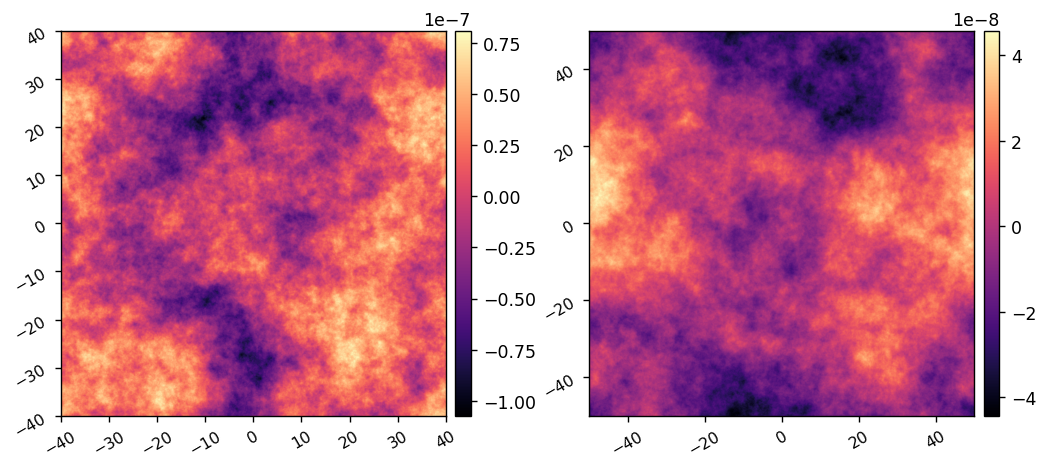

In [79]:
imshow2(tmodel.m1_opd.opd, tmodel.m2_opd.opd, 
        pxscl1=tmodel.m1_opd.pixelscale, pxscl2=tmodel.m2_opd.pixelscale.to(u.mm/u.pix))

imshow2(tmodel.m3_opd.opd, tmodel.m4_opd.opd, 
        pxscl1=tmodel.m3_opd.pixelscale.to(u.mm/u.pix), pxscl2=tmodel.m4_opd.pixelscale.to(u.mm/u.pix))

In [30]:
# Assume pointing stability is 10mas
pointing = 100*u.mas
display(pointing.to(u.degree))

<Quantity 2.77777778e-05 deg>

In [24]:
m2_shift_per_mas = (286.8754*u.mm - 286.8838*u.mm)/(100*u.mas)
m2_shift_per_mas

<Quantity -8.4e-05 mm / mas>

In [21]:
295.5493 + 286.8754, 291.3362*2

(582.4247, 582.6724)

In [18]:
253.436 - 175.5335, 39.192*2

(77.9025, 78.384)

In [25]:
m3_shift_per_mas = (175.5335*u.mm - 175.5244*u.mm)/(10*u.mas)
display(m3_shift_per_mas)

m3_shift_per_mas = (175.5335*u.mm - 175.4427*u.mm)/(100*u.mas)
display(m3_shift_per_mas)

<Quantity 0.00091 mm / mas>

<Quantity 0.000908 mm / mas>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcbd4ef50>


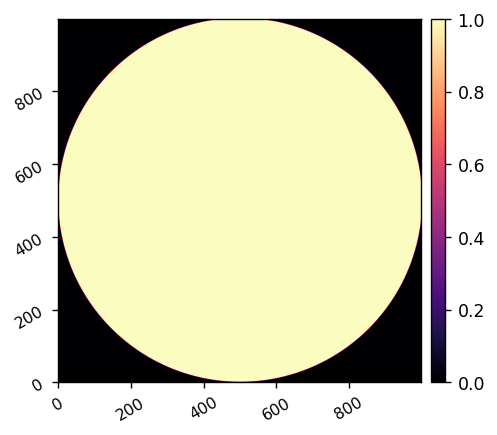

In [98]:
tmodel.npix = 1000
tmodel.oversample = 4

imshow1(tmodel.pupil_mask)

Propagating wavelength 650.000 nm.
PSF calculated in 0.241s
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcb2f9a50>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcb98e6d0>


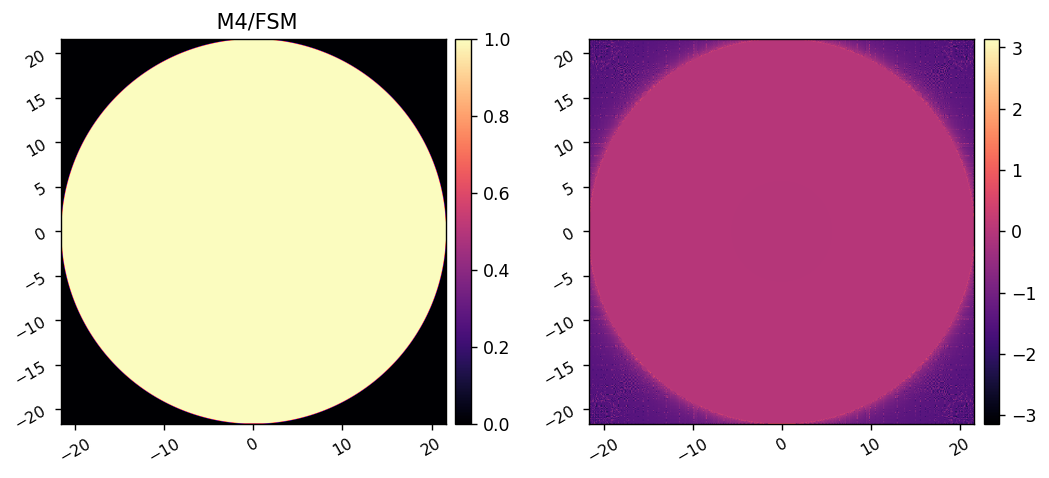

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.LogLocator object at 0x7b6fd4ce6550>
DEBUG:matplotlib.ticker:vmin 3.921836998532488e-09 vmax 38282.84626388235
DEBUG:matplotlib.ticker:ticklocs array([1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03,
       1.e+05, 1.e+07])
DEBUG:matplotlib.ticker:vmin 3.921836998532488e-09 vmax 38282.84626388235
DEBUG:matplotlib.ticker:vmin 3.921836998532488e-09 vmax 38282.84626388235
DEBUG:matplotlib.ticker:ticklocs array([1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03,
       1.e+05, 1.e+07])
DEBUG:matplotlib.ticker:vmin 3.921836998532488e-09 vmax 38282.84626388235
DEBUG:matplotlib.ticker:ticklocs array([1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03,
       1.e+05, 1.e+07])
DEBUG:matplotlib.ticker:vmin 3.921836998532488e-09 vmax 38282.84626388235
DEBUG:matplotlib.ticker:vmin 3.921836998532488e-09 vmax 38282.84626388235
DEBUG:matplotlib.ticker:ticklocs array([1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1

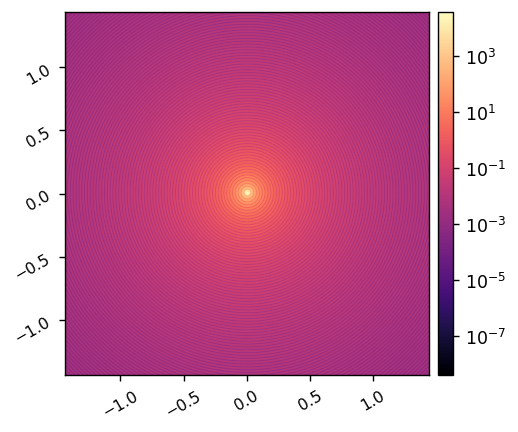

In [201]:
reload(fresnel_ote)
tmodel = fresnel_ote.OTE()
tmodel.m4_corr = -11*u.mm
tmodel.defocus = 2*u.mm
# tmodel.defocus = 64*u.mm
wfs = tmodel.calc_wfs()
wf = wfs[-2]
imshow2(wf.amplitude, wf.phase, ''+wf.location[5:], 
        pxscl=wf.pixelscale.to(u.mm/u.pix), npix=tmodel.npix)
imshow1(wfs[-1].intensity, pxscl=wfs[-1].pixelscale.to(u.mm/u.pix), lognorm=True, npix=512)

In [105]:
ROC = 3.653217939049540E+004*u.mm
OAD = 4000*u.mm

ROC = -3.666455045389474E+003*u.mm
OAD = 375*u.mm

ROC = 2.319999498167194E+003*u.mm
OAD = 275*u.mm

VFL = ROC/2
DEL = OAD**2 / (2*ROC)
A   = VFL - DEL
EFL = np.sqrt(A**2 + OAD**2)
EFL

<Quantity 1176.29824399 mm>

0.0 m 0.0 m
6500.0 mm
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd44a95d0>
DEBUG:matplotlib.colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x7b6fcb1bbb50> <matplotlib.colors.Normalize object at 0x7b6fcb1bbb50>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcbb75bd0>
DEBUG:matplotlib.colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x7b6fcb1bbb50> <matplotlib.colors.Normalize object at 0x7b6fcb1bbb50>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcbb75bd0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcbb7e450>


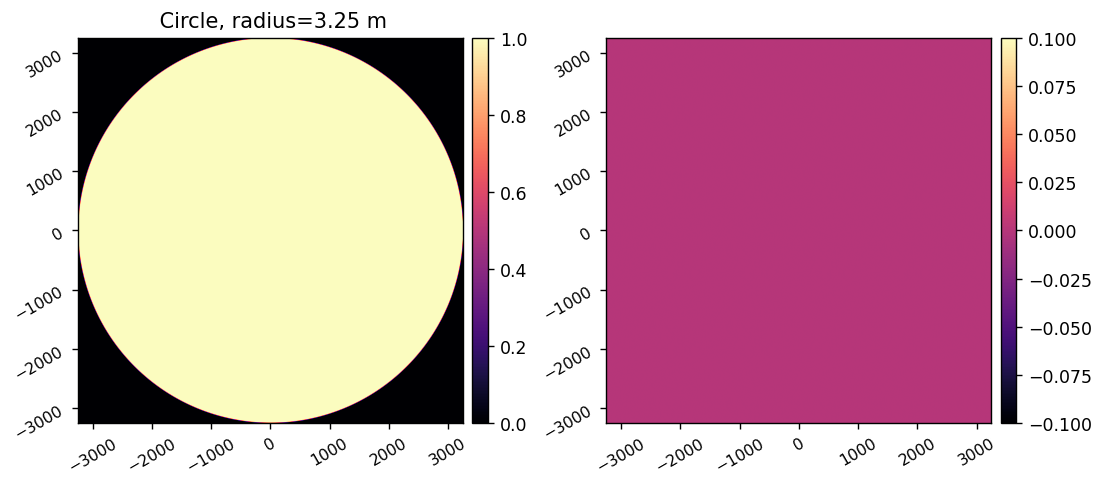

18.48507499999758 m 0.0 m
6500.0 mm
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd4483450>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcb591b50>


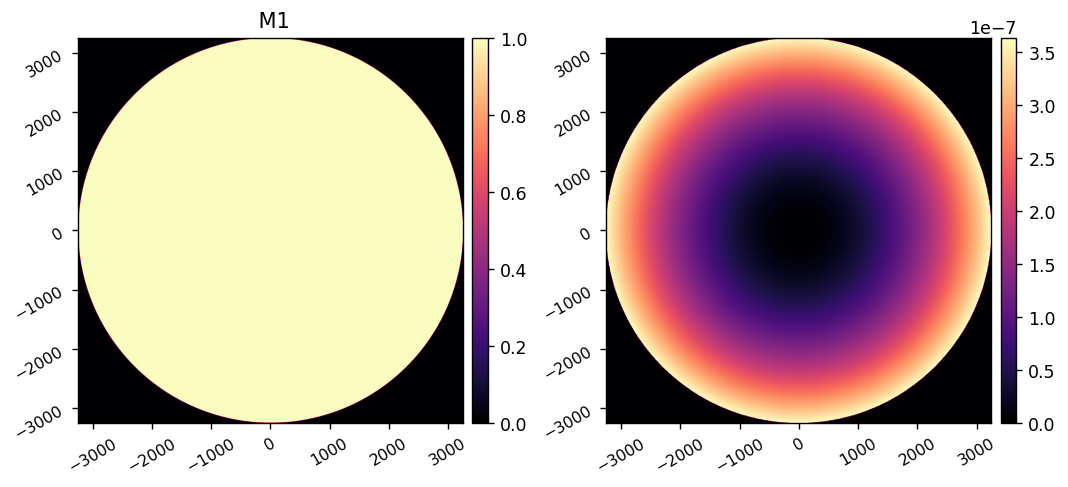

31.7340523872221 m 16.830339058470262 m
581.8631311979512 mm
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcaf95e10>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fcafe8990>


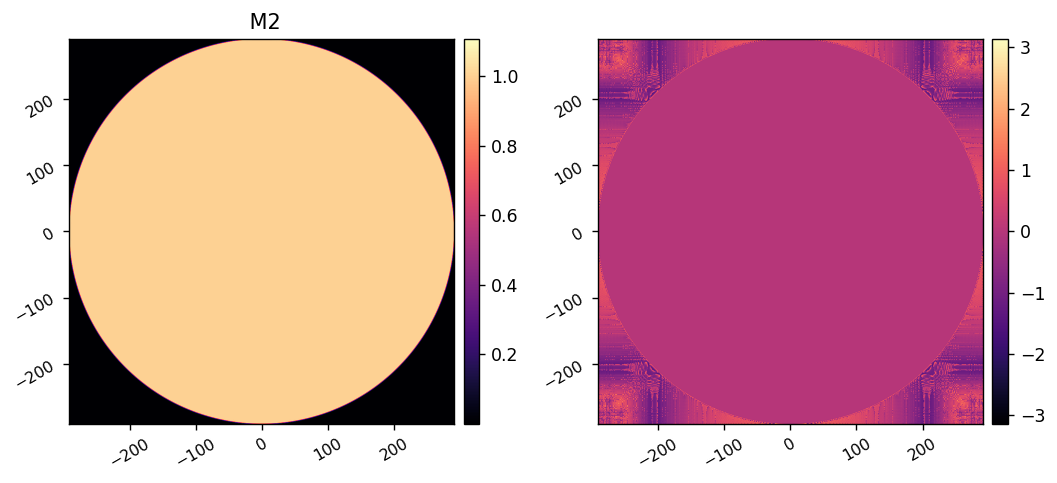

36.500934907761334 m 33.76259484843094 m
79.19731426730466 mm
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd424c650>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd4330990>


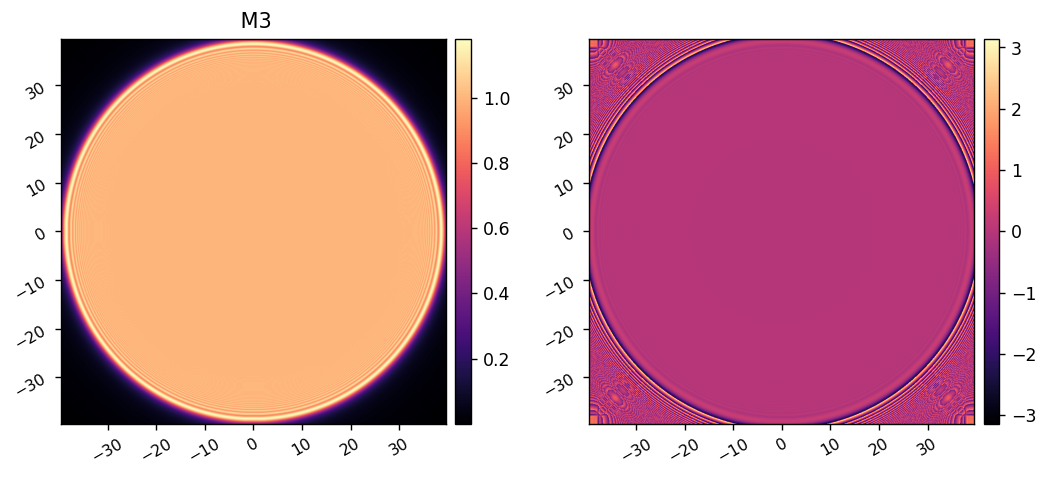

36.500934907761334 m 35.0167735137099 m
42.924397190038896 mm
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd42650d0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd4ce6890>


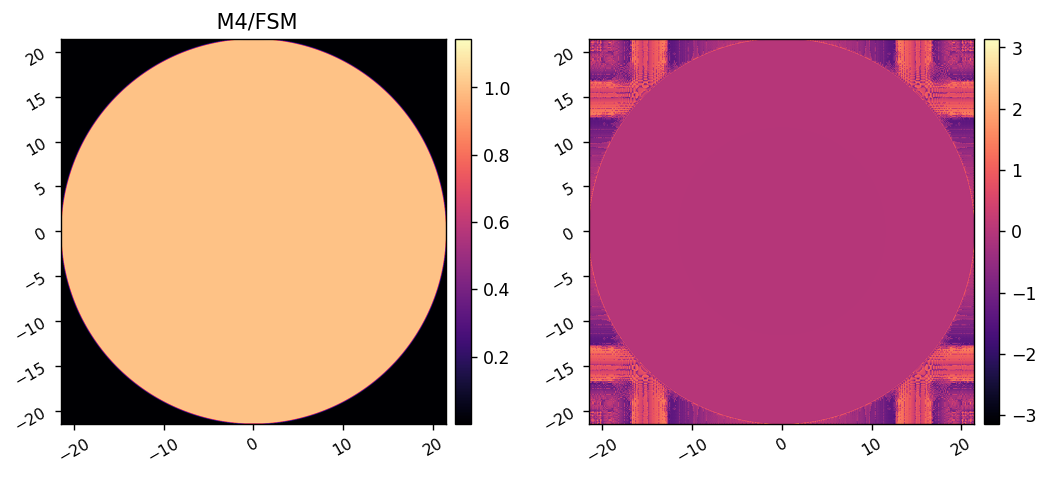

36.500934907761334 m 36.49864183336095 m
0.06631949647990852 mm
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.LogLocator object at 0x7b6fcb9177d0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7b6fd4a3c650>
DEBUG:matplotlib.ticker:vmin 1.2979478123552415 vmax 1.8548929975073436
DEBUG:matplotlib.ticker:ticklocs array([  0.1,   1. ,  10. , 100. ])
DEBUG:matplotlib.ticker:vmin 1.2979478123552415 vmax 1.8548929975073436
DEBUG:matplotlib.ticker:ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02])
DEBUG:matplotlib.ticker:vmin 1.2979478123552415 vmax 1.8548929975073436
DEBUG:matplotlib.ticker:ticklocs array([  0.1,   1. ,  10. , 100. ])
DEBUG:matplotlib.ticker:vmin 1.2979478123552415 vmax 1.8548929975073436
DEBUG:mat

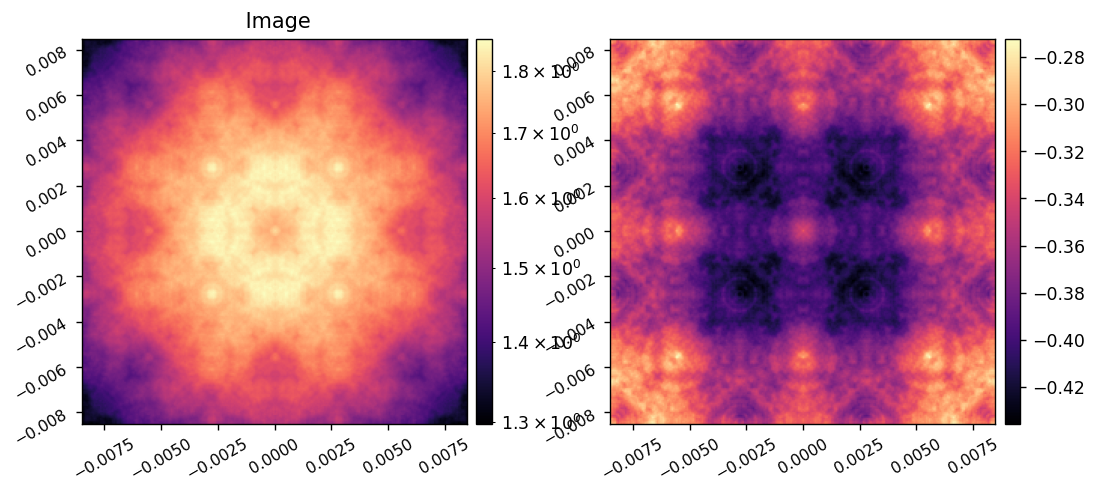

In [183]:
for i,wf in enumerate(wfs):
    if i<(len(wfs)-1):
        npix = tmodel.npix 
        lognorm = False
    else:
        npix = 256
        lognorm = True
    print(wf.z_w0, wf.z)
    diam = wf.pixelscale.to(u.mm/u.pix) * tmodel.npix *u.pix
    print(diam)
    imshow2(wf.amplitude, wf.phase, ''+wf.location[5:], 
            pxscl=wf.pixelscale.to(u.mm/u.pix), npix=npix, lognorm1=lognorm)

In [139]:
21.5849*2

43.1698

In [126]:
2*39.192*u.mm

<Quantity 78.384 mm>

In [125]:
2*291.3362*u.mm

<Quantity 582.6724 mm>

In [31]:
41.41526194839787 - 43.099553545340015

-1.6842915969421455